In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/ewill/Udemy - Data Analytics-Sciece/DATA/Telco-Customer-Churn.csv")

Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Many columns are numeric, we will have to eventually convert to dummy variables before we train our models 

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Our data is already clean, so let's move on to the analysis process. 

In [105]:
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

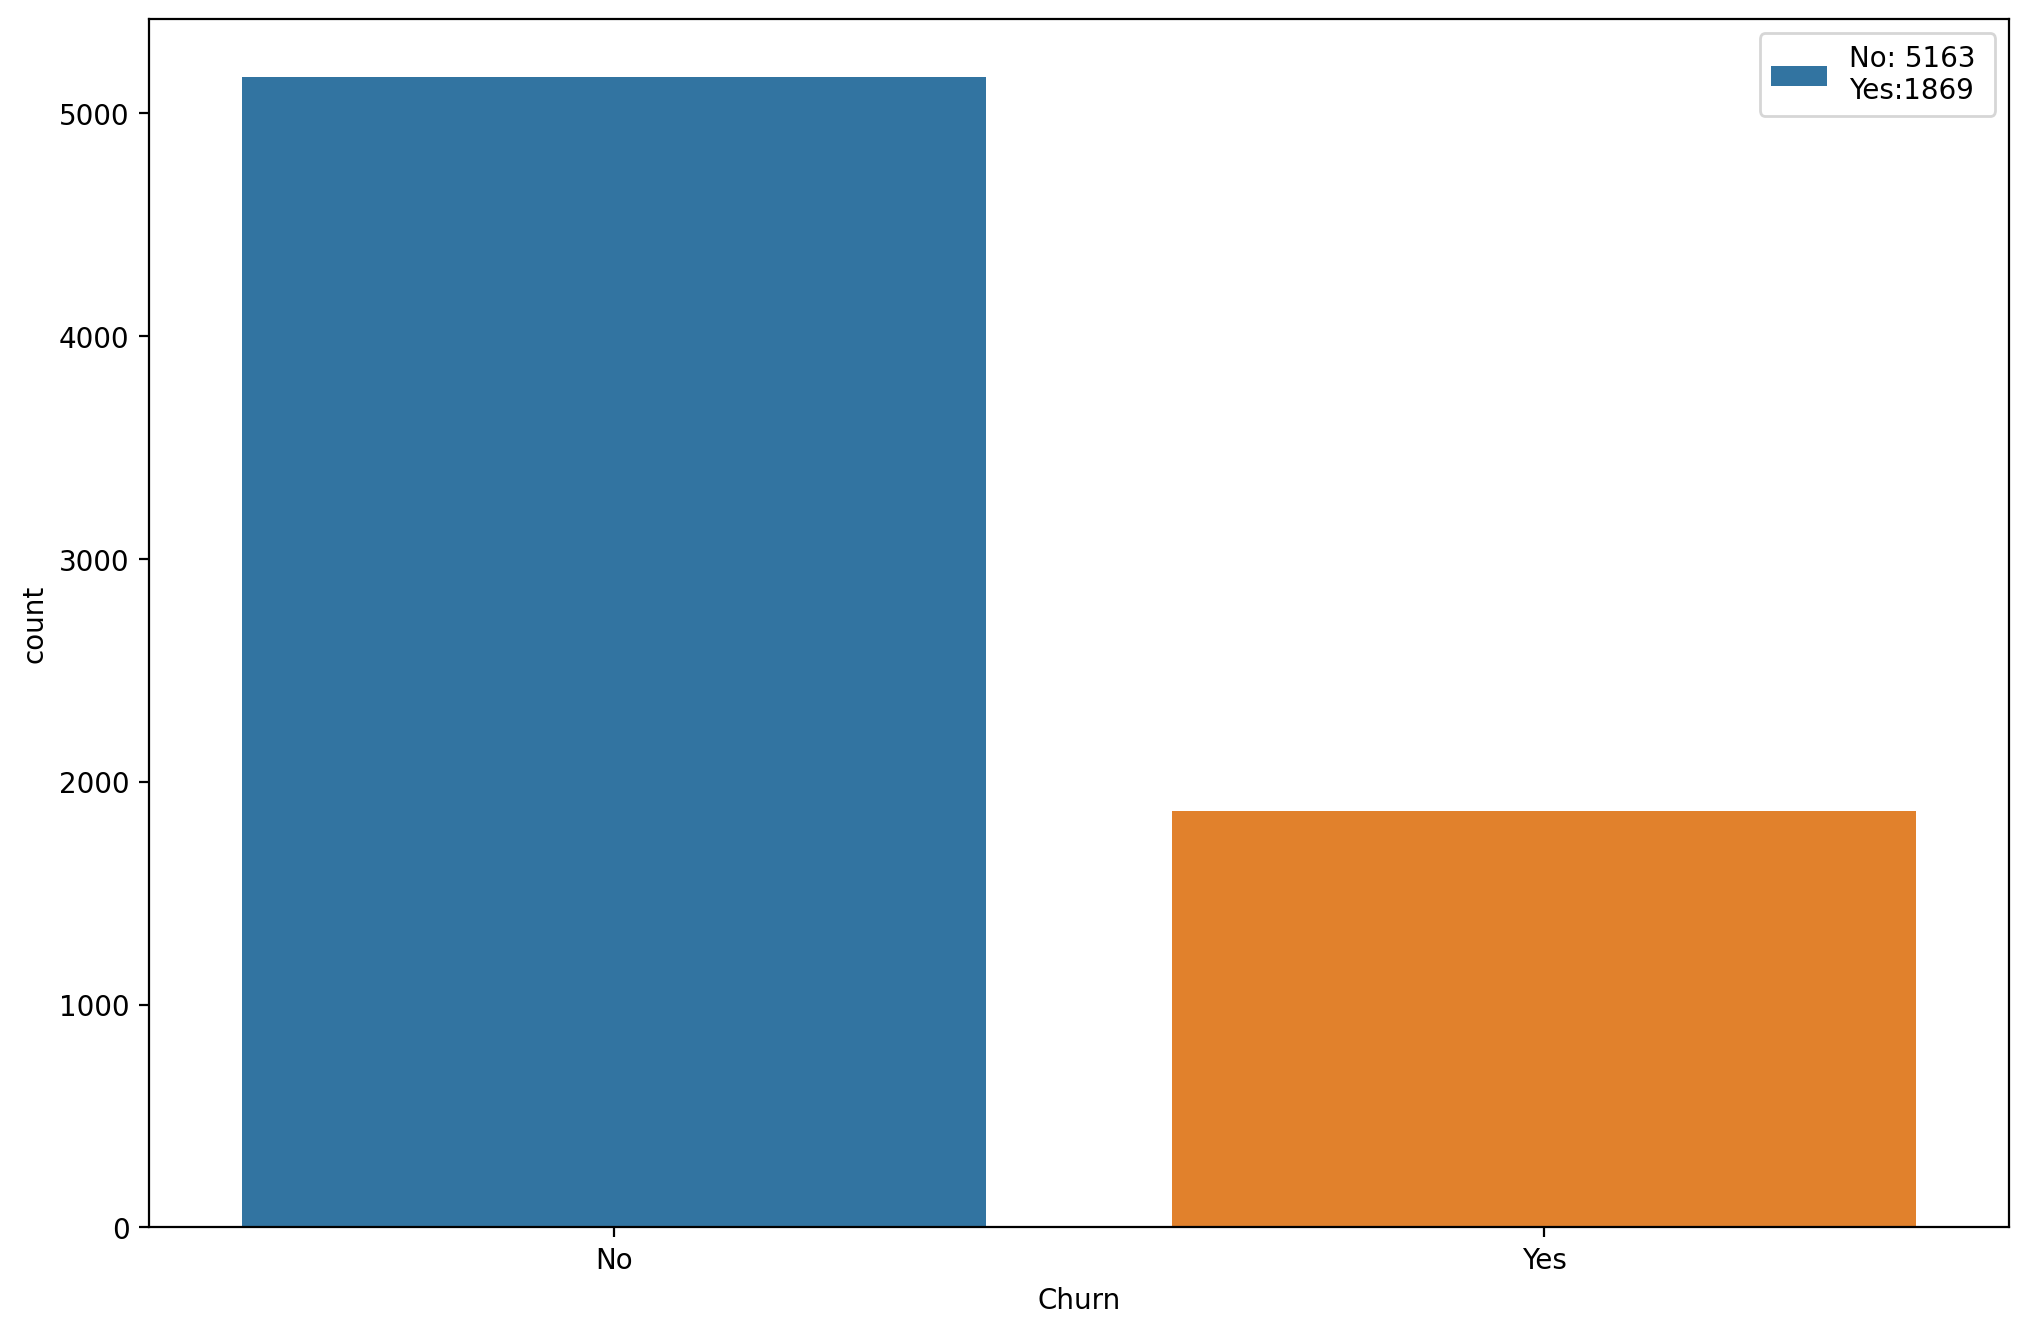

In [107]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x="Churn", label="No: 5163 \nYes:1869")
plt.legend();

The data is a little unbalanced but not extremely 

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

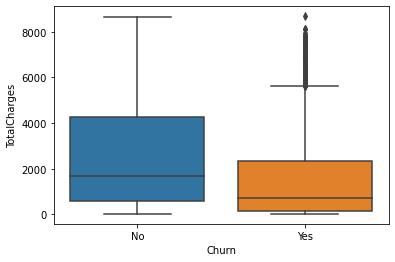

In [23]:
sns.boxplot(data=df, x="Churn", y="TotalCharges")

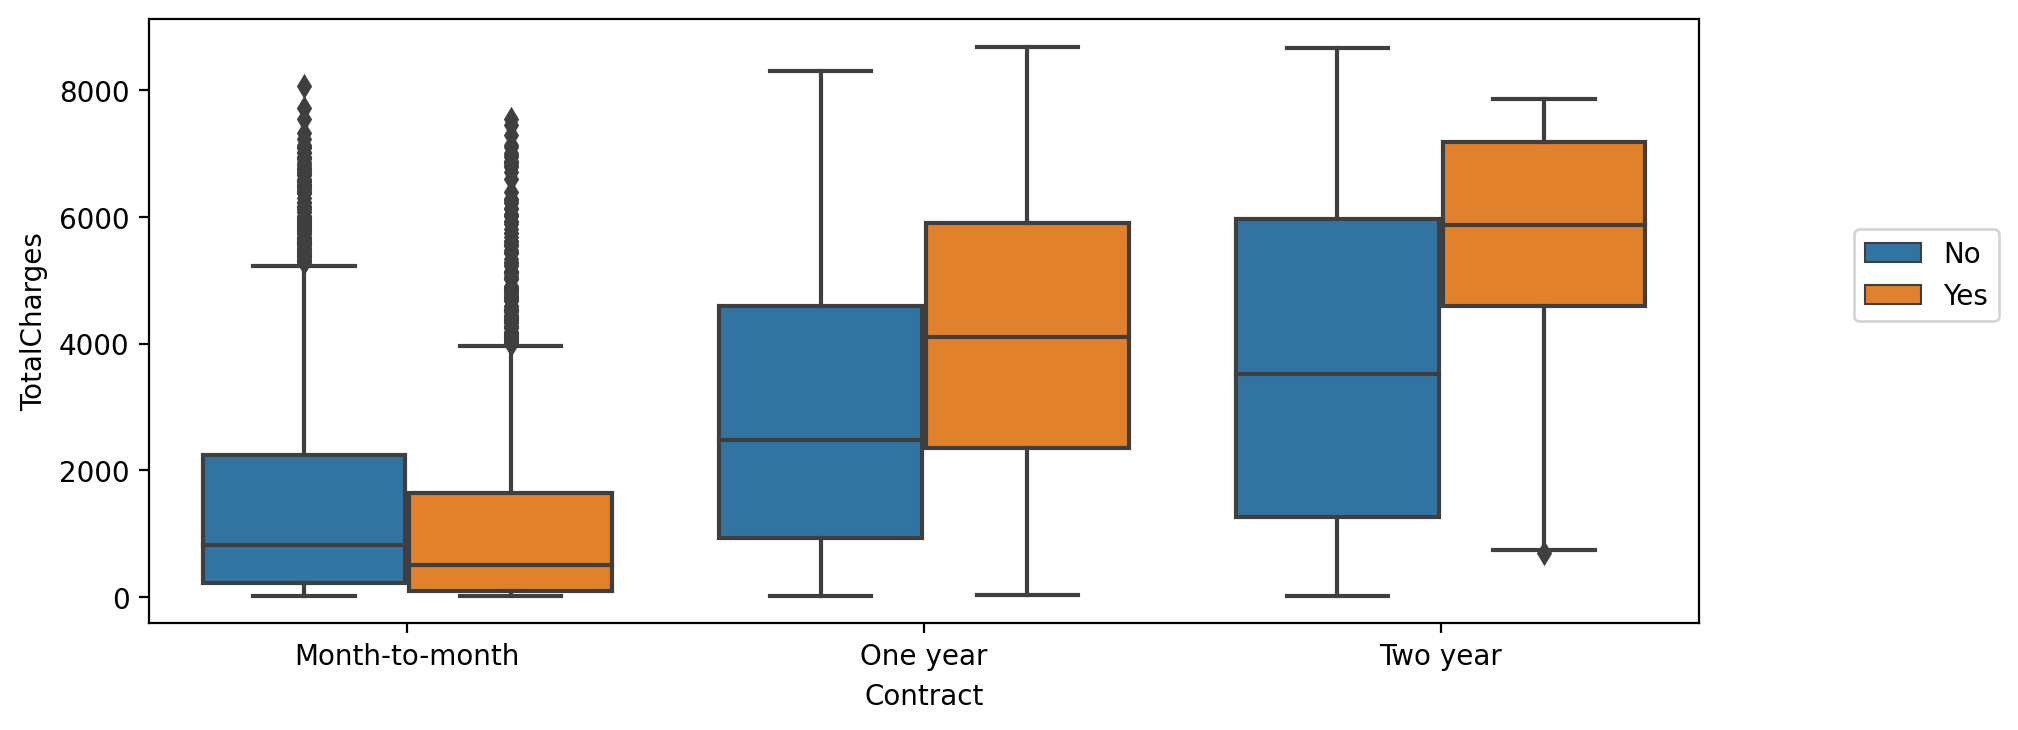

In [22]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df, y="TotalCharges", x="Contract", hue="Churn")
plt.legend(loc=(1.1,0.5))

We can see that the distribution of people who have churn "yes" versus "no" is actually quite similar to month to month versus the longer you stay on, the more charges you're getting for people who have actually churn.


Looking to the first plot it's very likely that if somebody is signing up for a month to month service, they're doing that because they don't expect to be on the service for a long time. The customer could just come with the expectation that they are going to churn eventually, maybe after a few months. We don't know the reason they're getting a month month service.
We could try to understand this a litle better to convert those short contracts on logger ones.

Is there something we can think of there to try to reduce churn?

The difference here in the distributions, when we're looking at a one year contract and we're comparing people that did churn versus people that did not churn, it looks like people who did churn are having overall higher total charges than people that did not churn. And, it's the exact same thing for the two year contract. It's even more extreme of a difference between the distribution of people who had more total charges that did churn versus people that did not churn, had usually lower total charges.

So essentially what that means is after one year or two year contracts, people are more likely to churn if they're having more total charge.

Is there a way we can possibly maybe have a reduction bonus after a one year contract or a two year contract where we bring down those charges again to make sure that customer doesn't churn?

Should we start looking at some sort of coupon program after a one year contract or a two year contract? 

based off these box plots, we can see that if the customer has more total charges, they're more likely to churn even after the one year or two year longer contract segments, rather than charging them less and having
them stay on. If we're able to keep that customer for longer, we can get a more amount of money from them in the long run versus trying to squeeze more money out of them over one year and then having them churn.

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]).corr()

In [37]:
corr_yes_churn = corr_df["Churn_Yes"].sort_values().iloc[1:-1]

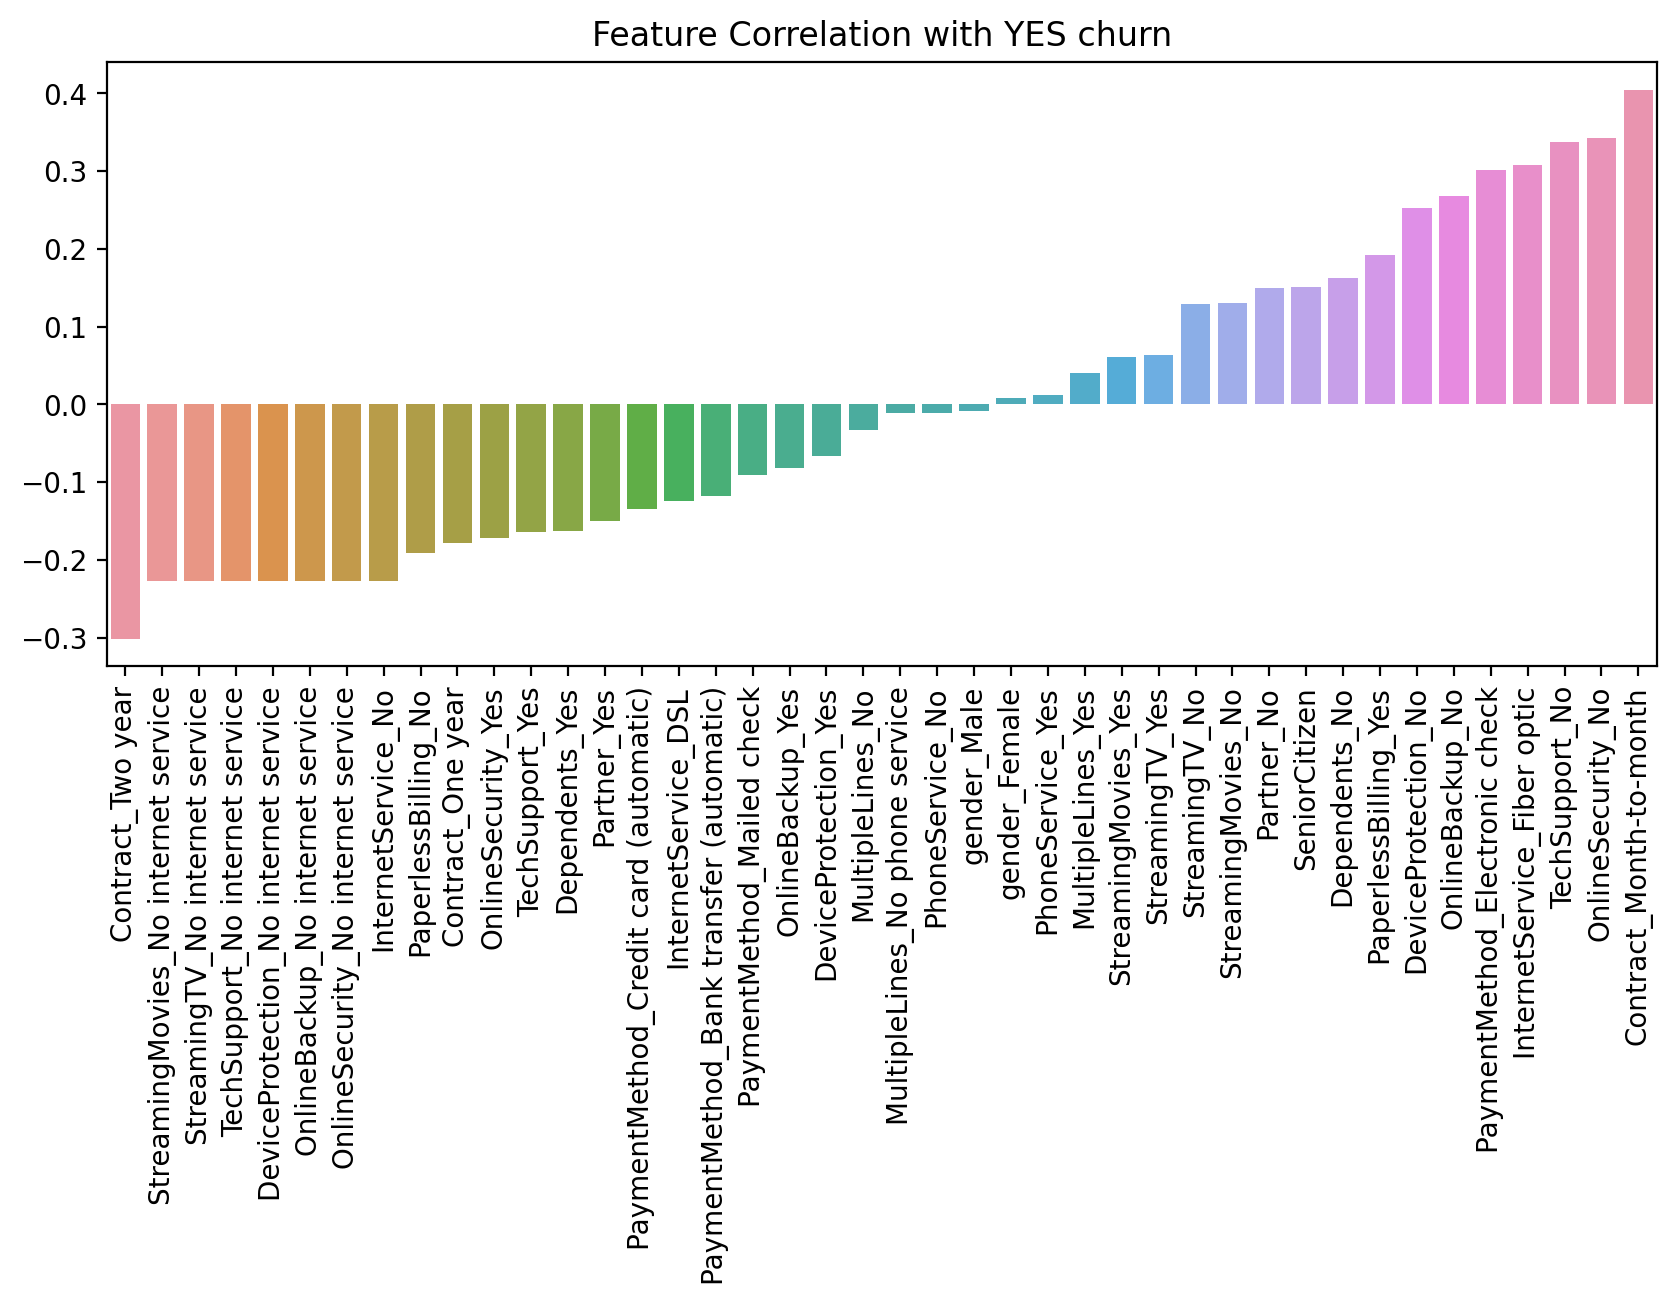

In [42]:
plt.figure(figsize=(10,4),dpi=200)
plt.title("Feature Correlation with YES churn")
sns.barplot(x=corr_yes_churn.index, y =corr_yes_churn.values)
plt.xticks(rotation=90);

We see that there is a high correlation between the type of contract being month to month and the current churn being yes

<AxesSubplot:xlabel='tenure', ylabel='Count'>

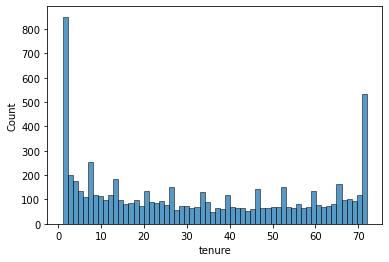

In [51]:
sns.histplot(data=df, x="tenure", bins=60)

here we have a large amount of customers that are only hanging on for maybe one or two months now.

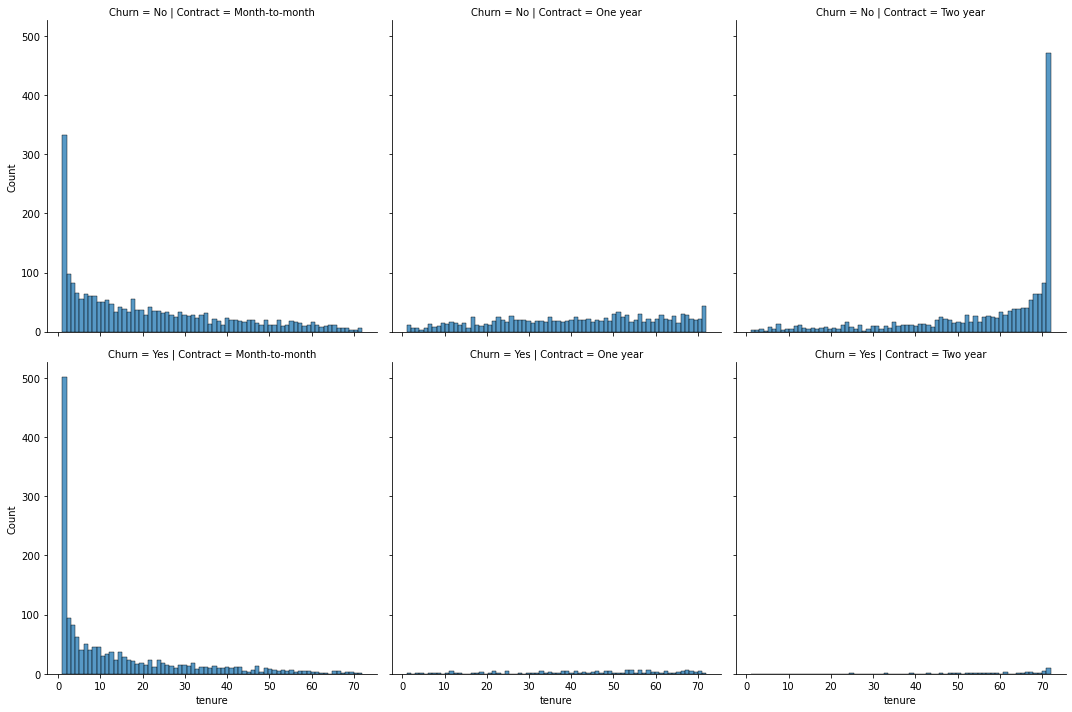

In [53]:
sns.displot(data=df, x="tenure", bins=70, col="Contract", row="Churn")

We clearly see here that those customers that indeed churn are most from month to month contracts 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

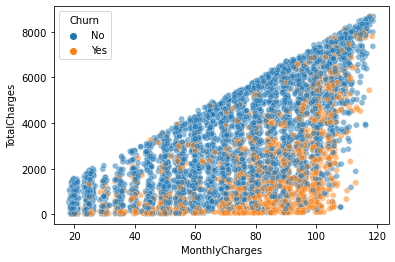

In [58]:
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", alpha=0.5)

we can see that a lot of people tend to turn when their monthly charges are higher.

We get a lot of churn for people to have high monthly rates and we're not getting as much total charge from these people, very likely around a month to month contract.
Those Month-to-Month contracts could end their tenure early.

In [61]:
yes_churn = df.groupby(["Churn", "tenure"]).count().transpose()["Yes"]

In [63]:
no_churn = df.groupby(["Churn", "tenure"]).count().transpose()["No"]

In [64]:
churn_rate = (100*yes_churn / (no_churn+yes_churn)).transpose()["customerID"]

<AxesSubplot:xlabel='tenure'>

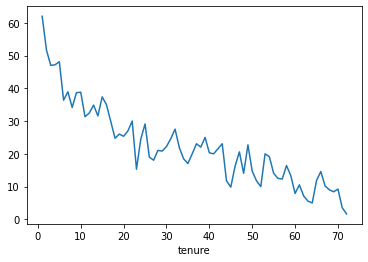

In [65]:
churn_rate.plot()

We clearly see the churn rate decreasing as long as the number of tenures increase

In [72]:
def cohort(tenure):
    if tenure<13:
        return "0-12 months"
    elif tenure<25:
        return "12-24 months"
    elif tenure <49:
        return "24-48 months"
    else:
        return "Over 48 Months"

In [74]:
df["Tenure Cohort"]=df["tenure"].apply(cohort)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

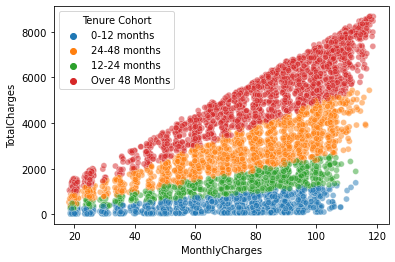

In [75]:
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Tenure Cohort", alpha=0.5)

We clearly see the correlation among the tenure cohort and the total of chrage payed 

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

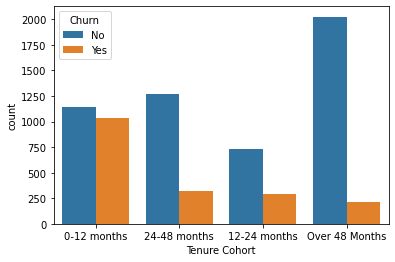

In [76]:
sns.countplot(data=df, x="Tenure Cohort", hue="Churn")

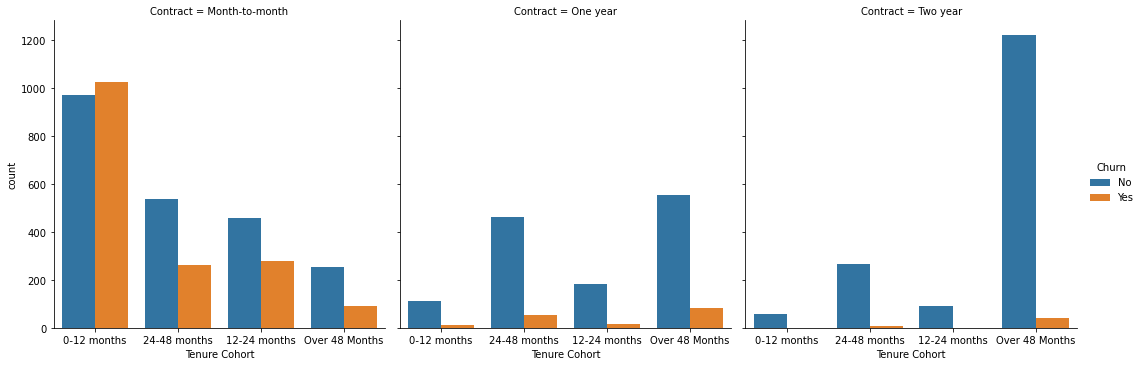

In [80]:
sns.catplot(data=df, x="Tenure Cohort",hue="Churn", kind="count", col="Contract")

There is no doubt that while the contract period increases the churn rate decreases 